# <span style="color:darkblue"> Lecture 11: Application 1 - Linear Regression </span>

<font size = "5">

We will fit statistical models to data

- I will give an intro with minimal stats background
- See the optional lecture file for advanced users

The primary goal is to practice previous commands

# <span style="color:darkblue"> I. Import Libraries </span>


In [2]:
# The "pandas" library is used for processing datasets
# The "numpy" is for numeric observations and random numbers
# The "matplotlib.pyplot" library is for creating graphs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<font size = "5">

Install the "statsmodels" library
- Run "pip3 install statsmodels" in the terminal
- Automatically included in Anaconda

In [3]:
# We will "alias" two sublibraries in "statsmodels"
# "statsmodels.formula.api" contains functions to estimate models
# "statsmodels.api" contains general-use statistical options

import statsmodels.api as sm
import statsmodels.formula.api as smf


# <span style="color:darkblue"> II. Generate simulated Data </span>

<font size = "5">

Create an empty dataset

In [4]:
dataset = pd.DataFrame([])

<font size = "5">

Create two random variables of size ($n = 50$)

In [5]:
n = 50
dataset["x"] = np.random.normal(loc = 0,scale = 1, size = n)
dataset["e"] = np.random.normal(loc = 0,scale = 1, size = n)


<font size = "5">

Create data from the linear model

$ y = b_0 + b_1 x + e, \qquad b_0 = 1, b_1 = 2.$

In [6]:
# The number b0 is known as the "intercept"
# The number b1 is known as the "slope"

b0 = 1
b1 = 2

# We can compute formulas directly over dataset columns
dataset["y"] = b0 + b1 * dataset["x"] + dataset["e"]

<font size = "5">

Compute the theoretically best fit line

$ p = b_0 + b_1 x$

In [7]:
dataset["p"] = b0 + b1*dataset["x"]

<font size = "5">

Plot the data

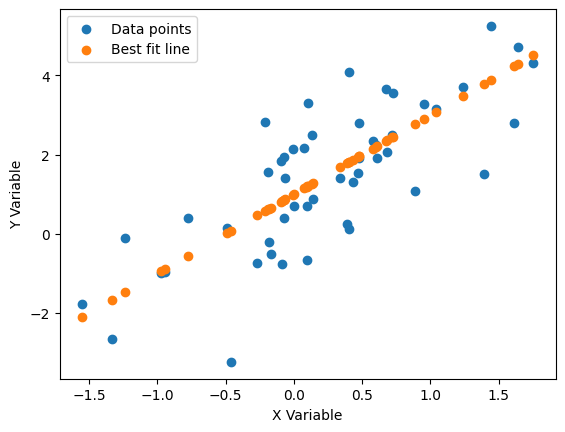

In [8]:
plt.scatter(x = dataset["x"], y = dataset["y"])
plt.scatter(x = dataset["x"], y = dataset["p"])

plt.xlabel("X Variable")
plt.ylabel("Y Variable")
plt.legend(labels = ["Data points", "Best fit line"])
plt.show()


<font size = "5" >

Try it yourself

- Create a new dataset called $\quad$```subset_above2``` 
- This subsets records with $y \ge 2$ using $\quad$```.query()```
- Count the original rows $\quad$ ```len(dataset)```
- Count the subsetted rows $\quad$ ```len(subset_above2)```
- Compute the proportion of subsetted observations


In [9]:
# Write your own code here

subset_above2 = pd.DataFrame([])
dataset["y"] = b0 + b1 * dataset["x"] + dataset["e"]
subset_above2 = dataset.query("y >= 2")
print(len(dataset))
print(len(subset_above2))



50
20


<font size = "5">

Try it yourself!

- Store the sample mean of $y$ as $\quad$ ```ybar```
- Compute the standard deviation of $y$ $\quad$ ```stdv_sample```
- Use ```.query()``` to subset observations that satisfy

$ \qquad abs\left(y - ybar \right) \le stdv\_sample $

$\quad$ HINT: Use ```.mean()```,$\text{ }$ ```.std()``` <br>
$\quad$ HINT: Use the globals  $\ $ ```@xbar```,$\text{ }$ ```@stdv_sample```

In [10]:
# Note: abs(...) is the absolute value function
# Write your own code 
dataset["y"] = b0 + b1 * dataset["x"] + dataset["e"]
ybar = dataset["y"].mean()
stdev_sample  =dataset["y"].std()
subsetstdev1 = dataset.query("abs(y-@ybar) <= @stdev_sample")
print(subsetstdev1)




           x         e         y         p
0  -0.009614  1.161577  2.142350  0.980773
2   0.097894 -0.493112  0.702675  1.195787
3  -0.773785  0.949086  0.401516 -0.547570
5   0.135332  1.230221  2.500885  1.270664
6   0.401668 -1.687801  0.115536  1.803337
8   0.388314 -1.538734  0.237894  1.776628
9  -0.213802  2.244153  2.816548  0.572395
10  0.478792  0.831334  2.788918  1.957584
11 -0.065502  0.546141  1.415137  0.868997
12 -0.180772 -0.847759 -0.209303  0.638456
14  1.391270 -2.273385  1.509154  3.782539
18  0.480272 -0.043834  1.916710  1.960544
19  0.716751  0.049633  2.483134  2.433501
21 -0.186590  0.946497  1.573317  0.626820
23  0.681925 -0.302943  2.060906  2.363850
25 -0.070822 -0.462072  0.396283  0.858355
28 -1.237261  1.359768 -0.114754 -1.474523
29  0.600466  0.053307  2.254238  2.200931
30  0.000926 -0.291003  0.710848  1.001852
31  0.576173  0.200745  2.353090  2.152345
33  1.044202  0.056319  3.144723  3.088404
34  0.471505 -0.397366  1.545644  1.943010
35  0.43492

# <span style="color:darkblue"> II. Estimate the best fit line</span>


<font size = "5">

We have data on $(y,x)$ but we don't know $(b_0,b_1)$

<font size = "5">

Let's fit an OLS model

- It's a statistical approach to get $(b_0,b_1)$
- No need to know how it works but why we want it

In [11]:
#------------------------------------------------------------------------------#
# We use the subfunction "ols()" in the library "smf"
#---- (i) The first argument is a string called "formula" with the format 
#-------- "outcome ~ indepdent_vars"
#----(ii) the second argument is the dataset
# The second line fits the model with standard errors "cov". In this case we 
# use "robust" standard errors (HC1)
#-------------------------------------------------------------------------------#

model   = smf.ols(formula = 'y ~  x',data = dataset)
results = model.fit(cov = "HC1")

# Can also run as one line
# results = smf.ols(formula = 'y ~ x',data = dataset).fit(cov = "HC1")


<font size = "5">

Compute the estimated best fit line

In [12]:
# We will use ".params" to get the attribute "parameters from the results"

b_list = results.params
print(b_list)

# We can then compute the "estimated" best fit lines
# by extracting the intercept and slop from "b_list"

dataset["p_estimated"] = b_list[0] + b_list[1]  * dataset["x"]

# Note: The estimators for "b0" and "b1" are close to 
# the values we used to generate the data


Intercept    1.001655
x            1.905958
dtype: float64


<font size = "5">

Plot the best fit line

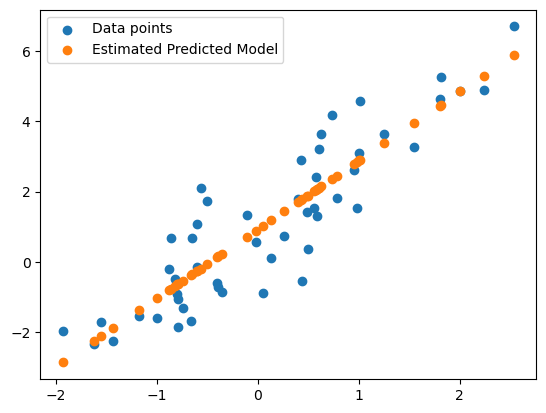

In [46]:
# Use scatter twice, with different "y" inputs
# THe "legend" command creates a box on with the color labels

plt.scatter(x = dataset["x"],y = dataset["y"])
plt.scatter(x = dataset["x"],y = dataset["p_estimated"])

plt.legend(labels = ["Data points","Estimated Predicted Model"])
plt.show()


<font size = "5">

Try it yourself!
- How good is the estimated fit?
- Create two overlapping scatterplots
- $(p \text{ }$ vs $\text{ } x)$ and $(p_{estimated} \text{ }$ vs $\text{ } x)$
- Create a legend to label each plot

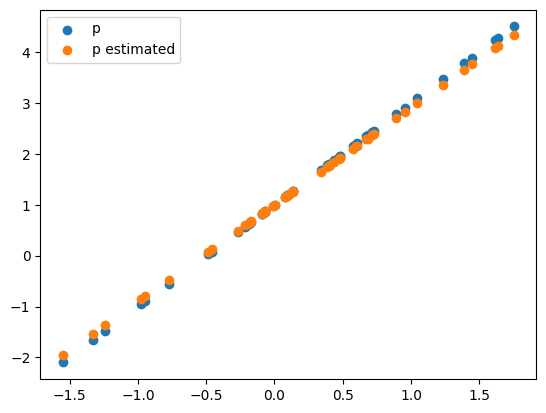

In [25]:
# Write your own code

plt.scatter(x= dataset["x"], y = dataset["p"])
plt.scatter(x= dataset["x"], y = dataset["p_estimated"])
plt.legend(labels = ["p", "p estimated"])






<font size = "5">

Try it youself

- Compute a column with the formula

$\quad$ ``` sample_error = y - p_estimated```

- Create a lambda function <br>

$\quad$ ``` fn_positive_error  error: error >= 0  ```

- Compute a column for whether the error is positive <br>
using ``` .apply()```



In [23]:
# Write your own code
dataset["sample_error"]= dataset["y"]-dataset["p_estimated"]
fn_positive_error = lambda sample_error: sample_error>= 0
dataset["positive_error"] = dataset["sample_error"].apply(fn_positive_error)
display(dataset)





,x,e,y,p,p_estimated,sample_error,positive_error
0,-0.009614,1.161577,2.142350,0.980773,0.983331,1.159018,True
1,0.404459,2.284709,4.093626,1.808917,1.772536,2.321091,True
2,0.097894,-0.493112,0.702675,1.195787,1.188236,-0.485561,False
3,-0.773785,0.949086,0.401516,-0.547570,-0.473147,0.874664,True
4,0.093993,-1.846175,-0.658190,1.187985,1.180801,-1.838990,False
5,0.135332,1.230221,2.500885,1.270664,1.259591,1.241293,True
6,0.401668,-1.687801,0.115536,1.803337,1.767218,-1.651682,False
7,1.639041,0.444373,4.722455,4.278082,4.125598,0.596857,True
8,0.388314,-1.538734,0.237894,1.776628,1.741765,-1.503871,False
9,-0.213802,2.244153,2.816548,0.572395,0.594156,2.222392,True


<font size = "5">

Try it yourself

- Compute a new column <br>

```error_sqr = sample_error ** 2```

- Calculate the mean of ```error_sqr```

In [30]:
# Write your own code
dataset["error_sqr"] = dataset["sample_error"]**2
print(dataset["error_sqr"].mean())







1.373761607568413
